In [11]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fx = pd.read_csv('../data/crc_{}_mut_cna_fus_clin.csv'.format('folfox'), index_col=0)
fi = pd.read_csv('../data/crc_{}_mut_cna_fus_clin.csv'.format('folfiri'), index_col=0)

In [79]:
fx.head()

,id_institution,id_drugs_list,OS,id_tt_os_g_mos,PFS,id_tt_pfs_m_g_mos,mut_CDK4,mut_CCND3,mut_CDH1,mut_CDK8,...,clin_ca_crc_crm,clin_ca_crc_peri_inv,clin_crc_type,OS_time,clin_Histology Category,clin_Histology,clin_Derived Grade or Differentiation of Tumor,clin_CEA,pred,pred_quartile
GENIE-DFCI-000233,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",0,100.986842,0.0,31.578947,0,0,0,0,...,2,0,2,3303,0,0,1,1.0,0.164166,0
GENIE-DFCI-000247,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",1,35.789474,0.0,3.914474,0,0,0,0,...,0,0,2,1163,0,0,0,4.9,0.590142,3
GENIE-DFCI-000306,DFCI,"bev, Fluorouracil, Leucovorin Calcium, Oxalipl...",0,38.125000,0.0,12.960526,0,0,0,0,...,2,0,3,1230,0,0,1,0.7,0.277740,1
GENIE-DFCI-000738,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",0,51.578947,NaN,NaN,0,0,0,0,...,2,0,3,1623,0,1,1,1.8,0.117713,0
GENIE-DFCI-000924,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",0,65.361842,NaN,NaN,0,0,0,0,...,2,1,0,2039,0,0,1,0.6,0.109232,0


In [7]:
today_str = '061923'
fx_params = pd.read_csv('../results/hp_search/results_xgb_folfox_OS_comb_061923.csv', index_col=0)

colsample_bytree = fx_params['param_colsample_bytree'].values[0]
lr = fx_params['param_learning_rate'].values[0]
max_depth = fx_params['param_max_depth'].values[0]
min_child_weight = fx_params['param_min_child_weight'].values[0]
n_estimators = fx_params['param_n_estimators'].values[0]
reg_alpha = fx_params['param_reg_alpha'].values[0]
reg_lambda = fx_params['param_reg_lambda'].values[0]
subsample = fx_params['param_subsample'].values[0]
xgb_fx = XGBClassifier(colsample_bytree=colsample_bytree, learning_rate=lr, max_depth=max_depth,
                          min_child_weight=min_child_weight, n_estimators=n_estimators, reg_alpha=reg_alpha,
                            reg_lambda=reg_lambda, subsample=subsample, random_state=0, n_jobs=-1)

fi_params = pd.read_csv('../results/hp_search/results_xgb_folfiri_OS_comb_061923.csv', index_col=0)

colsample_bytree = fi_params['param_colsample_bytree'].values[0]
lr = fi_params['param_learning_rate'].values[0]
max_depth = fi_params['param_max_depth'].values[0]
min_child_weight = fi_params['param_min_child_weight'].values[0]
n_estimators = fi_params['param_n_estimators'].values[0]
reg_alpha = fi_params['param_reg_alpha'].values[0]
reg_lambda = fi_params['param_reg_lambda'].values[0]
subsample = fi_params['param_subsample'].values[0]
xgb_fi = XGBClassifier(colsample_bytree=colsample_bytree, learning_rate=lr, max_depth=max_depth,
                            min_child_weight=min_child_weight, n_estimators=n_estimators, reg_alpha=reg_alpha,
                            reg_lambda=reg_lambda, subsample=subsample, random_state=0, n_jobs=-1)



In [8]:
X_fx = fx[[col for col in fx.columns if 'mut_' in col or 'cna_' in col or 'clin_' in col or 'fus_' in col]]
y_fx = fx['OS']
X_fi = fi[[col for col in fi.columns if 'mut_' in col or 'cna_' in col or 'clin_' in col or 'fus_' in col]]
y_fi = fi['OS']

xgb_fx.fit(X_fx, y_fx)
xgb_fi.fit(X_fi, y_fi)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [9]:
fx['pred'] = xgb_fx.predict_proba(X_fx)[:, 1]
fi['pred'] = xgb_fi.predict_proba(X_fi)[:, 1]

In [10]:
fx['pred_quartile'] = pd.qcut(fx['pred'], 4, labels=False)
fi['pred_quartile'] = pd.qcut(fi['pred'], 4, labels=False)

In [69]:
fx['pred_quartile'].value_counts()

pred_quartile
0    323
3    323
1    322
2    322
Name: count, dtype: int64

In [76]:
def plot_km(data, stratify_by, time, outcome):
    data_stage = {}
    km_stage = {}
    stages = data[stratify_by].unique()
    for stage in stages:
        data_stage[stage] = data[data[stratify_by] == stage]
        km_stage[stage] = pd.DataFrame(columns=['time', 'n_patients', 'n_died', 'prob_survival'])
        n_patients = data_stage[stage].shape[0]
        prob_survival = 1
        time_thresh = int(data[time].max().round())
        #loop through each time point in time_thresh
        for t in range(0, time_thresh + 1):
            #round time column to integer
            n_patients = n_patients - data_stage[stage][(data_stage[stage][time] == t) & (data_stage[stage][outcome] == 0)].shape[0]
            n_died = data_stage[stage][(data_stage[stage][time] == t) & (data_stage[stage][outcome] == 1)].shape[0]
            prob_survival = prob_survival * (1 - n_died/n_patients)
            perc_died = n_died/n_patients
            km_stage[stage] = pd.concat([km_stage[stage], pd.DataFrame([[t, n_patients, n_died, prob_survival]], columns=['time', 'n_patients', 'n_died', 'prob_survival'])], axis=0)
            n_patients = n_patients - n_died
    # cmap = sns.color_palette('mako', n_colors=len(stages))
    # colors = {}
    # for i, stage in enumerate(stages):
    #     colors[stage] = cmap[i]
    # plt.figure(figsize=(10,10))
    # for stage in km_stage.keys():
    #     plt.plot(km_stage[stage]['time'], km_stage[stage]['prob_survival'], label=stage, color=colors[stage], linewidth=3, alpha=0.8)
    # plt.xlabel('Time (days)')
    # plt.ylabel('Probability of survival')
    # plt.legend()
    # plt.rcParams.update({'font.size': 20})
    # plt.show()
    return km_stage

In [80]:
km_stage = plot_km(fx, 'pred_quartile', 'id_tt_os_g_mos', 'OS')
km_stage[0].head()

,time,n_patients,n_died,prob_survival
0,0,323,0,1.0
0,1,323,0,1.0
0,2,323,0,1.0
0,3,323,0,1.0
0,4,323,0,1.0


In [83]:
km_stage[1].head()

,time,n_patients,n_died,prob_survival
0,0,322,0,1.0
0,1,322,0,1.0
0,2,322,0,1.0
0,3,322,0,1.0
0,4,322,0,1.0


In [84]:
km_stage[2].head()

,time,n_patients,n_died,prob_survival
0,0,322,0,1.0
0,1,322,0,1.0
0,2,322,0,1.0
0,3,322,0,1.0
0,4,322,0,1.0


In [ ]:
plt.plot(km_stage[stage]['time'], km_stage[stage]['prob_survival'], label=stage, color=colors[stage], linewidth=3, alpha=0.8)

0
3
1
2


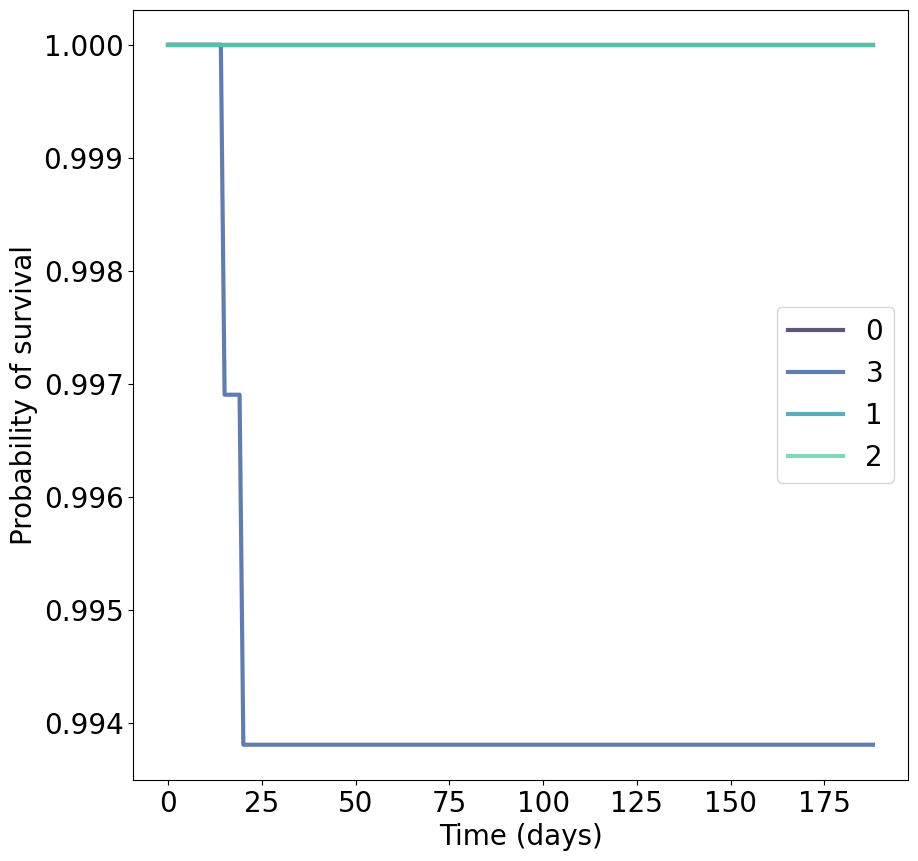

In [82]:
stages = fx['pred_quartile'].unique()
cmap = sns.color_palette('mako', n_colors=len(stages))
colors = {}
for i, stage in enumerate(stages):
    colors[stage] = cmap[i]
plt.figure(figsize=(10,10))
for stage in km_stage.keys():
    print(stage)
    plt.plot(km_stage[stage]['time'], km_stage[stage]['prob_survival'], label=stage, color=colors[stage], linewidth=3, alpha=0.8)
plt.xlabel('Time (days)')
plt.ylabel('Probability of survival')
plt.legend()
plt.rcParams.update({'font.size': 20})
plt.show()

In [75]:
len(km_stage)

TypeError: object of type 'NoneType' has no len()

In [56]:
data = fx
stratify_by = 'pred_quartile'
time = 'id_tt_os_g_mos'
data_stage = {}
km_stage = {}
stages = data[stratify_by].unique()
for stage in stages:
    data_stage[stage] = data[data[stratify_by] == stage]
    print(data_stage[stage][time].max())



172.236842105263
161.776315789474
187.631578947368
150.065789473684


In [55]:
fx['pred_quartile'].unique()

array([0, 3, 1, 2])

In [53]:
data_stage.values

<function dict.values>

In [52]:
data_stage['0'].shape

KeyError: '0'

<Axes: >

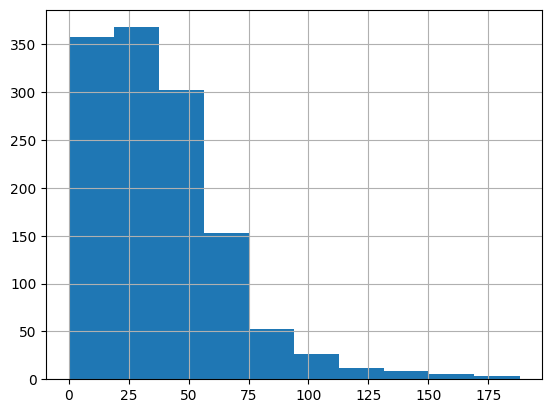

In [37]:
fx['id_tt_os_g_mos'].round().hist()